In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import numpy as np
import random

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/victoria/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7734/2106784005.py", line 1, in <module>
    import pandas as pd
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 914, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1407, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1376, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1340, in _path_importer_cache
OSError: [Errno 5] Input/output error

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/victoria/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    

In [18]:
pheno = pd.read_csv('dbGaP_primary_phenotypes.tsv',sep='\t',names=['study accession','primary_phenotype'])
d = pd.Series(pheno.primary_phenotype.values,index=pheno['study accession']).to_dict()

df = pd.read_csv('summary_fourth.csv')
a = df['filename'].str.split('\.',expand=True)
a[1] = a[1].str.replace("\/data\/", "")
df['study accession'] = a[1]+'.'+a[2]+'.'+a[5]
df['primary phenotype'] = df['study accession'].map(d)
df = df[['male','female','study accession','primary phenotype']]

df = df.groupby(['study accession','primary phenotype'])[['male','female']].max()
df['ratio'] = df['female']/df['male']
df = df.groupby(['primary phenotype'])['ratio'].mean().reset_index()
df = df.replace([np.inf, -np.inf], np.nan).dropna() # remove NaN and Inf
df = df.sort_values('ratio')

with pd.option_context('display.max_rows', 1000):
    print(df) 

                                     primary phenotype       ratio
363                                        Melanocytes    0.000000
115                                           Chordoma    0.000000
486          Prostatic Neoplasms, Castration-Resistant    0.000000
484                              Prostatic Hyperplasia    0.000000
482                                  Prostate Neoplasm    0.000000
279                                      Hypogonadism     0.000000
63                                       Blepharospasm    0.000000
519                         Sertoli Cell-Only Syndrome    0.000000
455                                          Podocytes    0.000000
429                                       Otitis Media    0.000000
415                                          Neuroglia    0.000000
311              Jacobsen Distal 11q Deletion Syndrome    0.000000
406                 Neoplasms, Germ Cell and Embryonal    0.000000
351                                     MELAS Syndrome    0.00

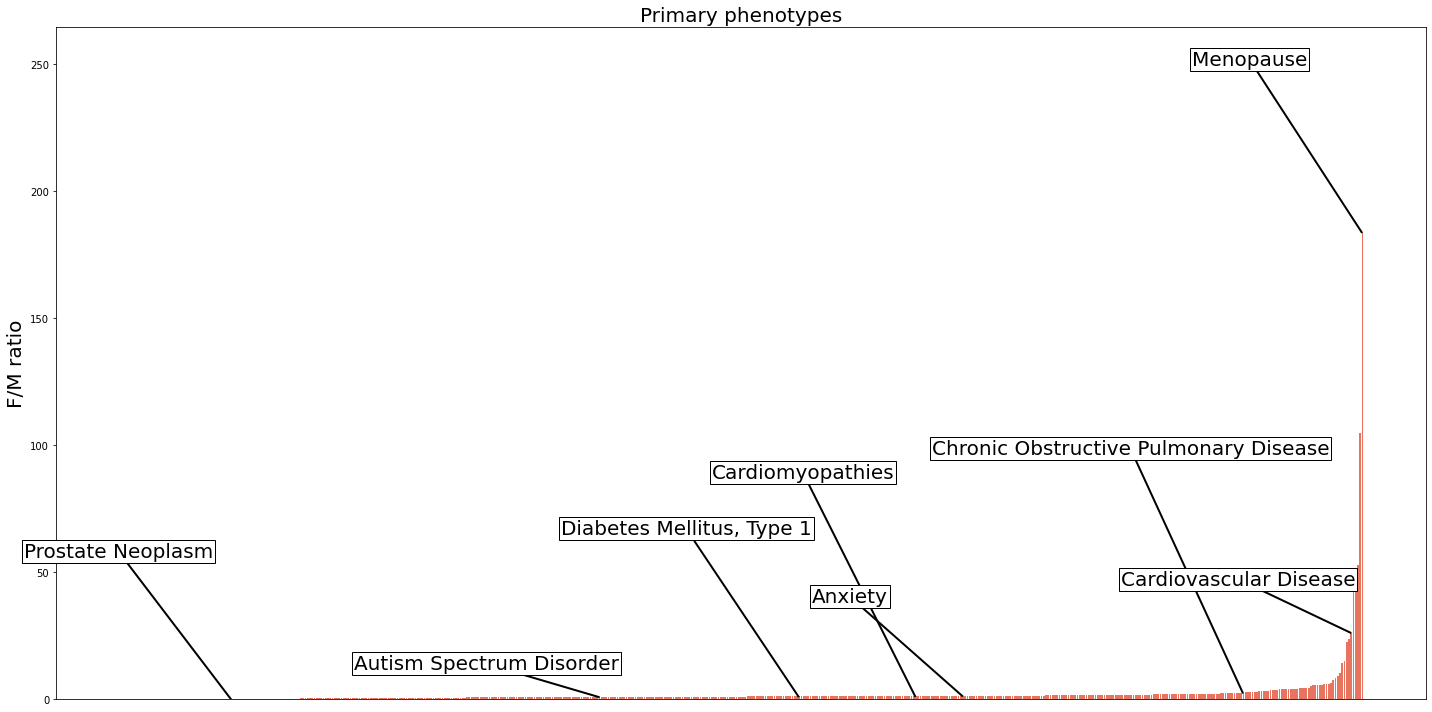

In [33]:
g = sns.barplot(x="primary phenotype", y="ratio", data=df,color='tomato')
g.set(xticklabels=[]) 
g.set_title('Primary phenotypes',fontsize=20)
g.set_ylabel("F/M ratio",fontsize=20)
g.set(xlabel=None)
g.tick_params(bottom=False)

x0,y0=g.get_xlim(),g.get_ylim()

y = [rectangle.get_height() for rectangle in g.patches]
x = [g.patches[i].get_x() for i in range(len(y))]

a = pd.DataFrame(
    {'primary phenotype': df['primary phenotype'],
     'x': x,
     'y': y
    })

for pheno in ['Menopause','Prostate Neoplasm', 'Autism Spectrum Disorder',
              'Diabetes Mellitus, Type 1', 'Cardiomyopathies', 'Anxiety',
             'Chronic Obstructive Pulmonary Disease','Cardiovascular Disease']:
    x1 = a[a['primary phenotype']==pheno]['x']
    x2 = x1-50
    y1 = a[a['primary phenotype']==pheno]['y']
    y2 = y1+random.randrange(0, 100)
    plt.plot([x1,x2], [y1,y2], 'k-', lw=2)
    plt.text(x2, y2, pheno, size=20,
            bbox={'facecolor':'white','alpha':1,'edgecolor':'k','pad':2},
              ha='center', va='center')
plt.tight_layout()
plt.show()